In [1]:
import pandas as pd
#파이썬 대표적인 통계 데이터 시각화 도구
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset("titanic")
titanic.to_csv('titanic.csv', index=False)

##데이터 정리 작업이 필요한지 확인하기
#결측치 확인
titanic.isnull().sum()
#나이는 중앙값으로 대체
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

#최빈값 확인
titanic['embarked'].value_counts()
#embarked는 최빈값으로 대체
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode())
#deck 최빈값으로 대체
titanic['deck'] = titanic['deck'].fillna(titanic['deck'].mode())
#embark_town 최빈값으로 대체
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode())

titanic.info()  #데이터에 대한 전반적인 정보 탐색
titanic.survived.value_counts()  #컬럼의 각 값에 대한 모든 발생 횟수 반환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         204 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived
0    549
1    342
Name: count, dtype: int64

#### 시각적 데이터 탐색 1 - 남, 여 승객 생존율 pie 차트로 그리기

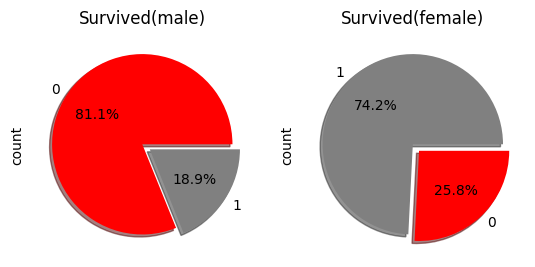

In [3]:
male_color = ['red', 'grey']
female_color = ['grey', 'red']

#남자 생존율 차트
#subplot은 여러 개의 그래프를 하나의 그림으로 나타낼 수 있음
plt.subplot(1, 2, 1)  #(1,2,1)은 세로1, 가로2인 상자에서 1번째에 들어간다는 뜻
titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(explode=[0, 0.1], colors=male_color, 
                                                                    autopct='%.1f%%', shadow=True)
plt.title('Survived(male)')
#여자 생존율 차트
plt.subplot(1, 2, 2)   #(1,2,1)은 세로1,가로2인 상자에서 2번째에 들어간다는 뜻
# explode(배열 넣어서 파이 조각 떨어트리기), autopct(%출력), shadow(True로 바꾸면 그림자가 생긴다(기본값 False))
titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(explode=[0, 0.1], colors=female_color, 
                                                                    autopct='%.1f%%', shadow=True)
plt.title('Survived(female)')
plt.show()

시각적 데이터 탐색 1 - 객식 등급별 생존자 수 막대 그래프로 그리기

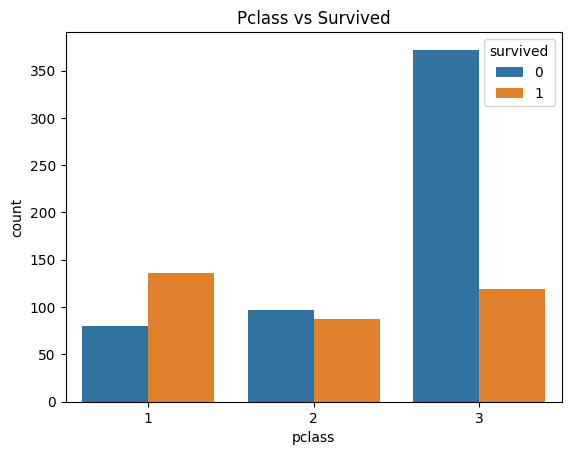

In [10]:
#1.countplot
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()

#>> 1등 선신 생존자 수가 가장 많다., 3등 선실 사망자 수가 가장 많다.

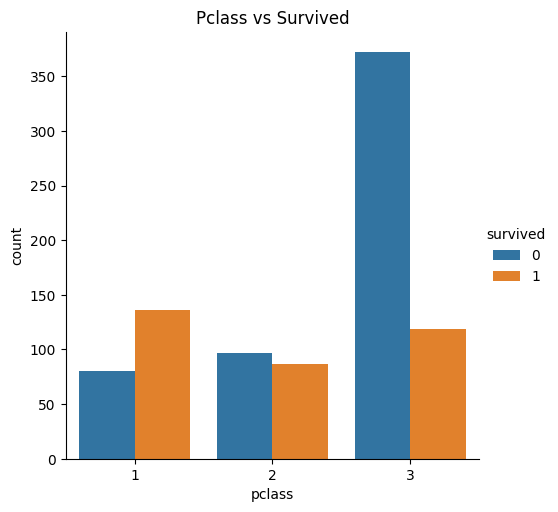

In [11]:
sns.catplot(x='pclass', hue='survived', data=titanic, kind='count')  #kind옵션을 주어 해당 차트 그리기
plt.title('Pclass vs Survived')
plt.show()

#### 산점도로 상관분석 시각화

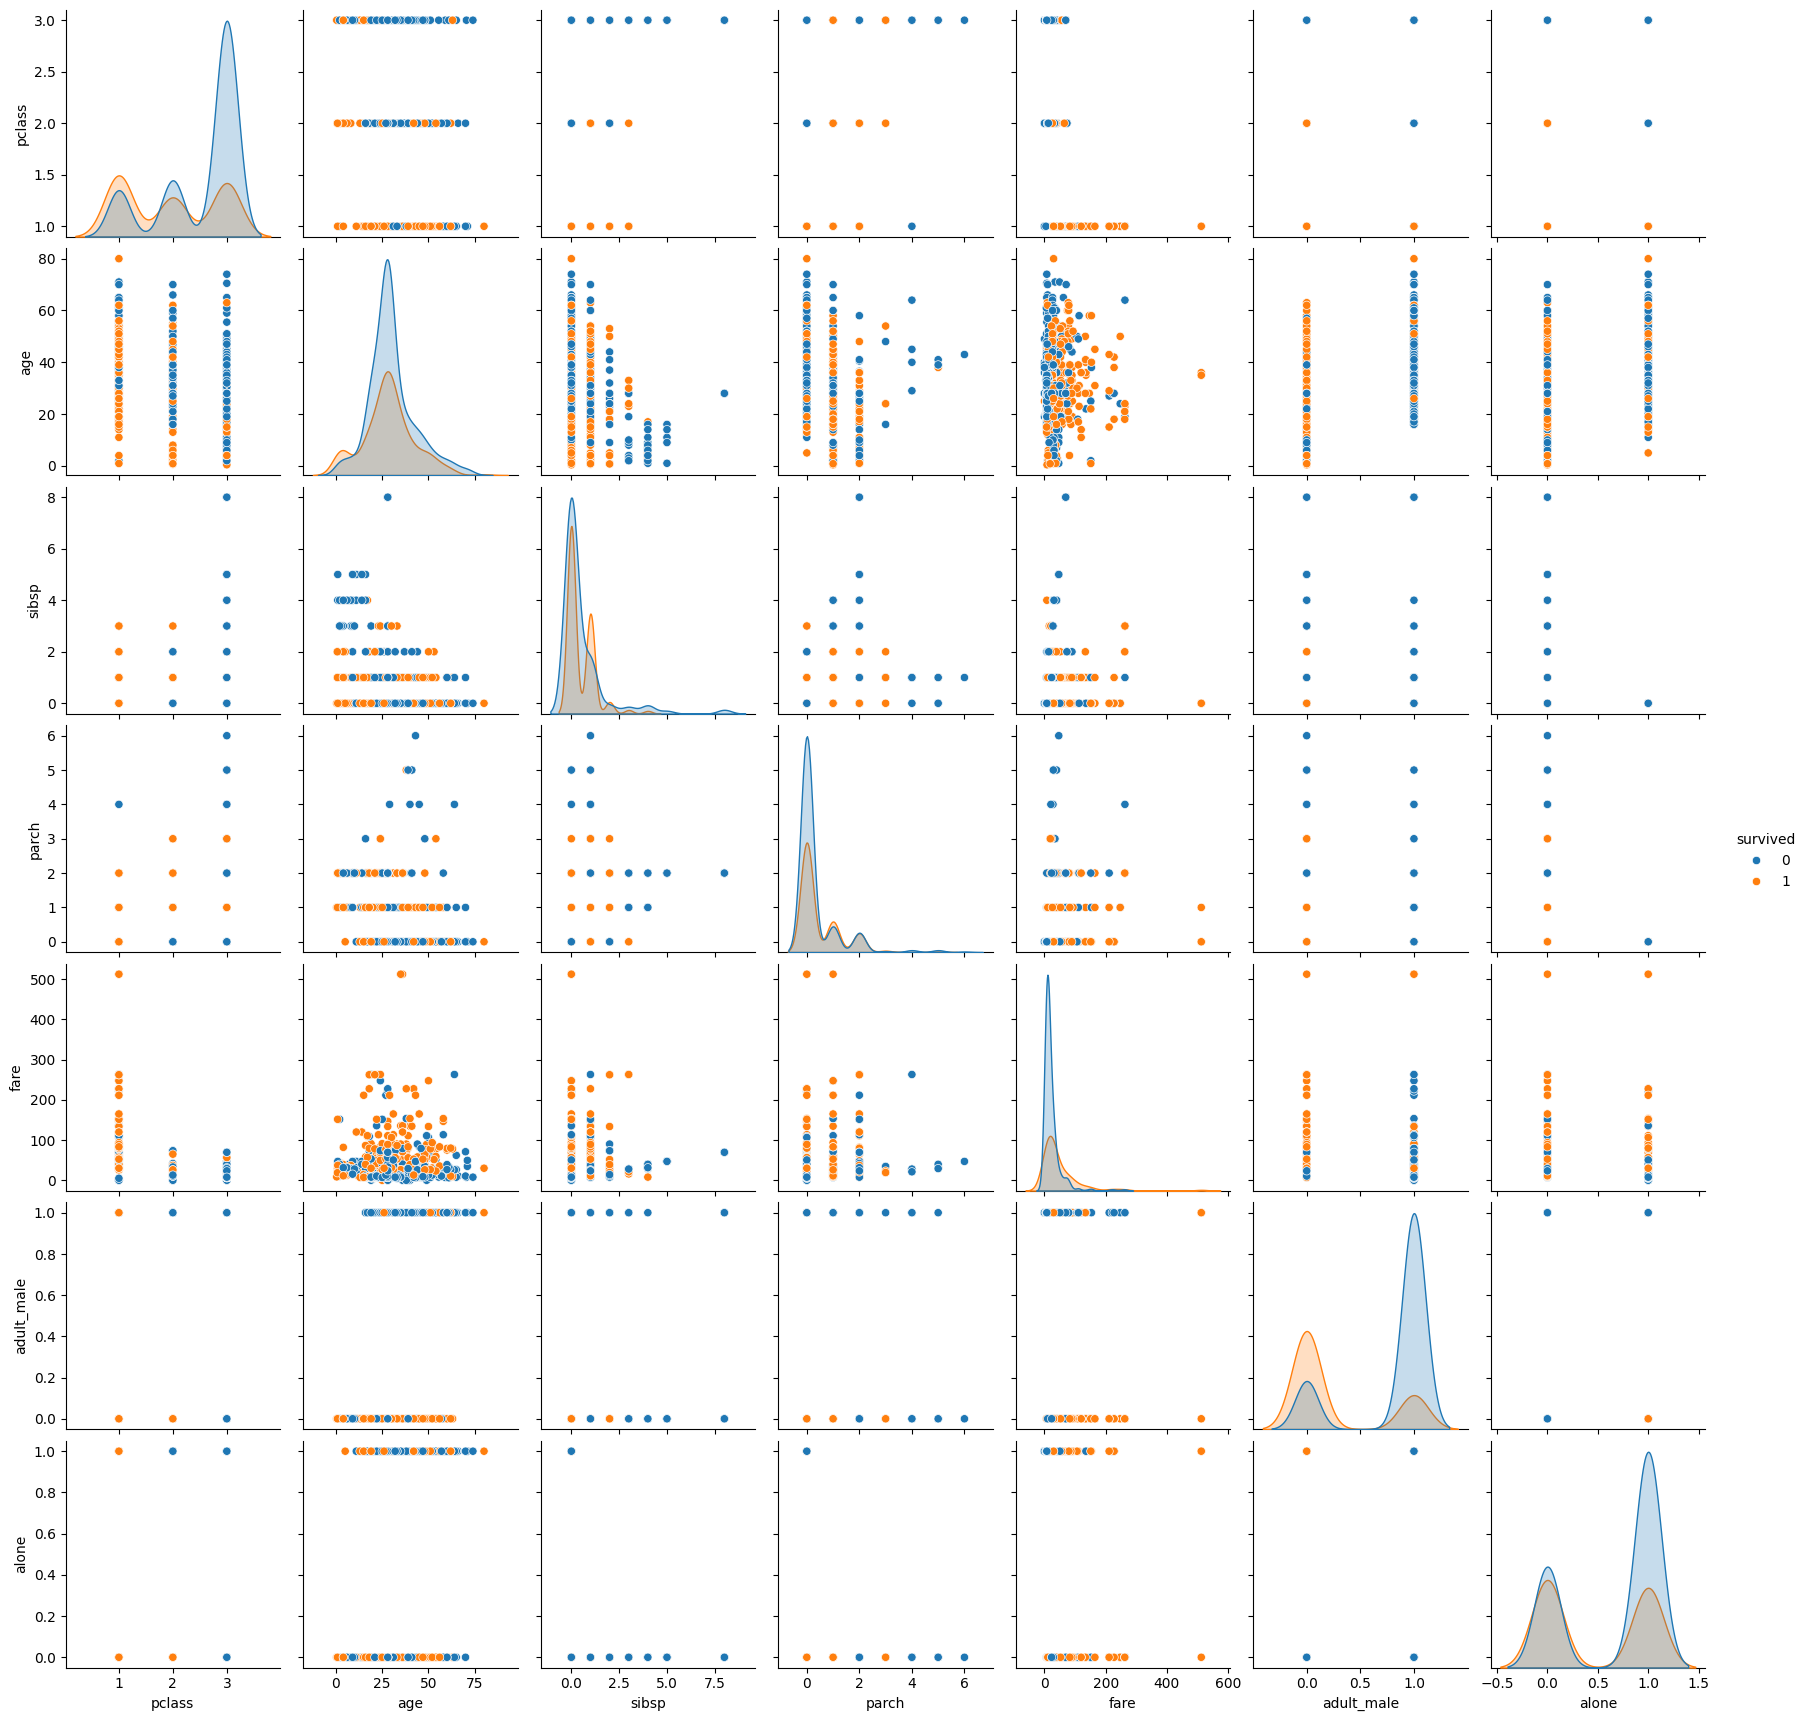

In [6]:
#pairplot(): 그리드 형태로 데이터프레임에 있는 각 데이터 열의 조합을 산점도로 그린다.
#+ 같은 데이터가 만나는 대각선 영역에는 히스토그램을 그린다.
sns.pairplot(titanic, hue='survived')
plt.show()

#### 상관관계 시각화

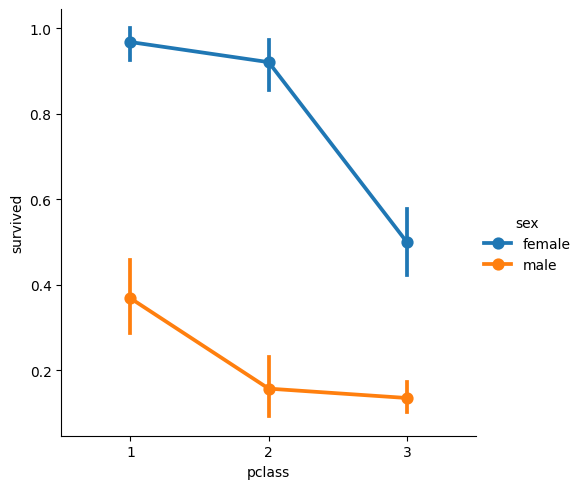

In [7]:
#pclass와 survived 변수의 관계를 차트로 그리기, hue 인자를 이용하여 종속 변수를 sex로 지정한다.
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')
plt.show()

#### 좌석 등급별 남,녀 survived 비율 파이 그래프

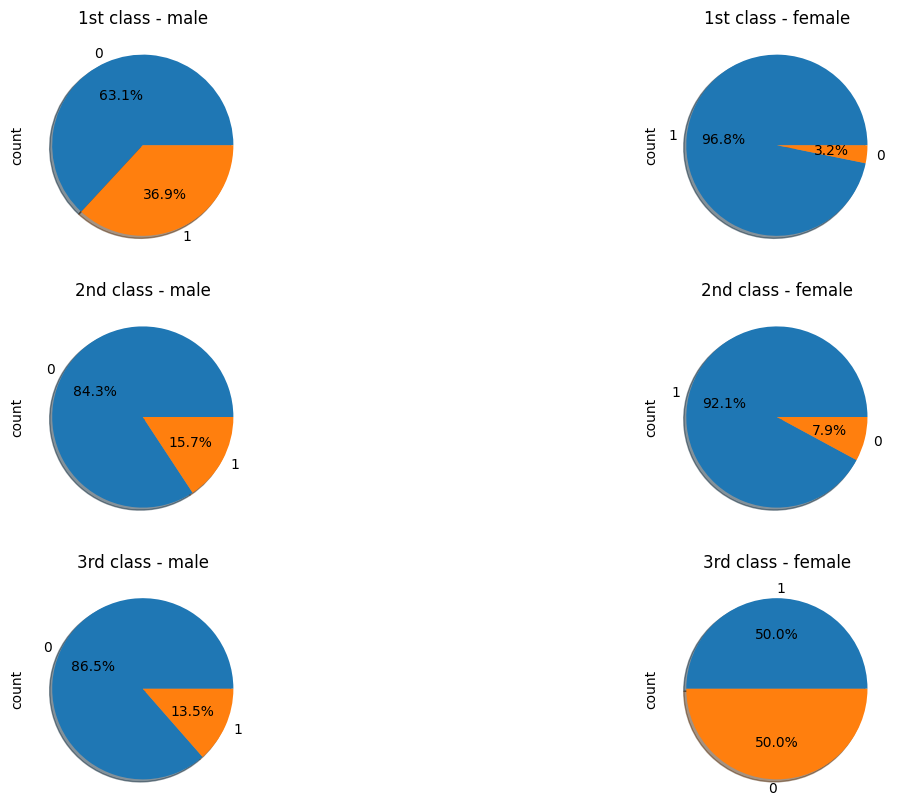

In [9]:
f, ax = plt.subplots(3, 2, figsize=(15,10))

#pclass1
titanic['survived'][titanic['sex']=='male'][titanic['pclass']==1].value_counts().plot.pie(autopct='%.1f%%', shadow=True, ax=ax[0,0])
ax[0,0].set_title('1st class - male')

titanic['survived'][titanic['sex']=='female'][titanic['pclass']==1].value_counts().plot.pie(autopct='%.1f%%', shadow=True, ax=ax[0,1])
ax[0,1].set_title('1st class - female')

#pclass2
titanic['survived'][titanic['sex']=='male'][titanic['pclass']==2].value_counts().plot.pie(autopct='%.1f%%', shadow=True, ax=ax[1,0])
ax[1,0].set_title('2nd class - male')

titanic['survived'][titanic['sex']=='female'][titanic['pclass']==2].value_counts().plot.pie(autopct='%.1f%%', shadow=True, ax=ax[1,1])
ax[1,1].set_title('2nd class - female')

#pclass3
titanic['survived'][titanic['sex']=='male'][titanic['pclass']==3].value_counts().plot.pie(autopct='%.1f%%', shadow=True, ax=ax[2,0])
ax[2,0].set_title('3rd class - male')

titanic['survived'][titanic['sex']=='female'][titanic['pclass']==3].value_counts().plot.pie(autopct='%.1f%%', shadow=True, ax=ax[2,1])
ax[2,1].set_title('3rd class - female')

plt.show()